### **Multiclass Classification**

**Involves Dataset with multiple class labels**



**Techniques to Implement Multiclass Classification**

---


**1. One-vs-Rest (OvR)**

---


Splits a multiclass problem into multiple binary classification problems, one for each class.

**How it works:** Trains one classifier per class, with each classifier distinguishing between that class and all other classes.

**Prediction:** The classifier with the highest score determines the predicted class.

**Pros:** Simple to implement; works well with many algorithms.

**Cons:** Can struggle with imbalanced classes

---

**2. One-vs-One (OvO)**

---

Breaks down the multiclass problem into multiple binary classifiers, one for every pair of classes.

**How it works:** Trains a separate classifier for every pair of classes. If there are classifiers.

**Prediction:** Uses a voting system where each classifier votes for a class, and the most voted class is the final prediction.

**Pros:** More efficient for algorithms that scale poorly with the number of classes; reduces the impact of class imbalance.

**Cons:** Computationally expensive when the number of classes is large.



**The following algorithms can be applied with both OvR and OvO techniques for multiclass classification**

    Logistic Regression (LogisticRegression)
    Support Vector Machine (SVC with linear kernel)


**Tree-Based Models (Usually Support OvR Directly)**

    Decision Tree (DecisionTreeClassifier)
    Random Forest (RandomForestClassifier)
    Extra Trees (ExtraTreesClassifier)
    Gradient Boosting (GradientBoostingClassifier)

**Naive Bayes (Commonly Used with OvR)**

    Gaussian Naive Bayes (GaussianNB)
    Multinomial Naive Bayes (MultinomialNB)
    Bernoulli Naive Bayes (BernoulliNB)

**Neural Networks (Can Be Wrapped)**

    MLP Classifier (MLPClassifier)
    Usually, softmax activation handles multiclass directly (OvR).

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import classification_report

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# Load data
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [ ]:
# Spit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
classifiers = {
              'Logistic Regression': LogisticRegression(max_iter=200),
              'SVM'           : SVC(),
              'Decision Tree' : DecisionTreeClassifier(),
              'Random Forest' : RandomForestClassifier(),
              'Gaussian NB'   : GaussianNB(),
              'MLP Classifier': MLPClassifier(max_iter=200)
          }

# Compare models with OvR and OvO
results = []

for name, model in classifiers.items():

    # One-vs-Rest
    ovr_model = OneVsRestClassifier(model)
    ovr_model.fit(X_train, y_train)
    y_pred_ovr = ovr_model.predict(X_test)
    ovr_report = classification_report(y_test, y_pred_ovr, output_dict=True)

    # One-vs-One
    ovo_model = OneVsOneClassifier(model)
    ovo_model.fit(X_train, y_train)
    y_pred_ovo = ovo_model.predict(X_test)
    ovo_report = classification_report(y_test, y_pred_ovo, output_dict=True)

    results.append({
        'Model': name,
        'OvR Accuracy': ovr_report['accuracy'],
        'OvO Accuracy': ovo_report['accuracy']
    })


In [ ]:
results_df = pd.DataFrame(results)
results_df

,Model,OvR Accuracy,OvO Accuracy
0,Logistic Regression,0.966667,1.000000
1,SVM,1.000000,1.000000
2,Decision Tree,1.000000,1.000000
3,Random Forest,1.000000,1.000000
4,Gaussian NB,0.966667,1.000000
5,MLP Classifier,1.000000,0.966667


**Evaluating Classification Metrics**

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Pratik-Bhujade/Diamond-Dataset/refs/heads/master/DiamondData.csv')

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.50,Fair,G,SI1,64.5,57.0,10352.0,7.15,7.09,4.59
1,0.70,Ideal,E,VS2,61.4,57.0,2274.0,5.72,5.78,3.53
2,1.22,Premium,G,VS1,61.3,58.0,8779.0,6.91,6.89,4.23
3,0.51,Premium,E,VS2,62.5,60.0,1590.0,5.08,5.10,3.18
4,2.02,Very Good,J,SI2,59.2,60.0,11757.0,8.27,8.39,4.91


In [5]:
df['cut'].value_counts()

,count
cut,
Ideal,19918
Premium,12826
Very Good,8975
Good,4559
Very Geod,2242
Fair,1480


In [6]:
# For the sake of exercise we will have 3 labels

df  = df[df['cut'].isin(['Ideal','Premium','Very Good'])]

In [8]:
X, y = df.drop("cut", axis=1), df["cut"] # Split X and Y

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, test_size=0.33, stratify=y) # Split train and test

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, StandardScaler

categorical_cols = X.select_dtypes(include="object").columns.to_list()
categorical_pipe = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

# Build numeric processor
to_log     = ["price", "carat"]
to_scale   = ["x", "y", "z", "depth", "table"]

numeric_pipe_1 = make_pipeline(PowerTransformer())
numeric_pipe_2 = make_pipeline(StandardScaler())


Transform= ColumnTransformer(
        transformers=[
            ("categorical", categorical_pipe, categorical_cols),
            ("power_transform", numeric_pipe_1, to_log),
            ("standardization", numeric_pipe_2, to_scale),
        ]
    )

pipe = Pipeline(
    steps=[
        ("preprocess", Transform),
        ("base",  RandomForestClassifier(max_depth=13),),
    ]
)
_ = pipe.fit(X_train, y_train)

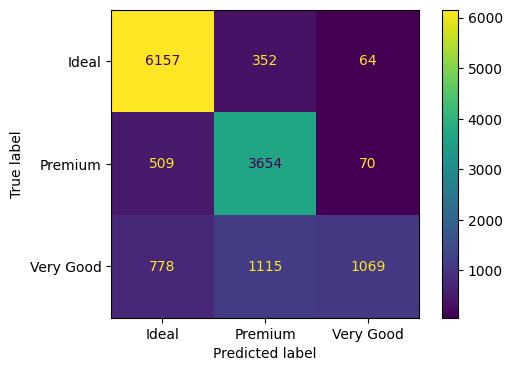

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import matplotlib.pyplot as plt

y_pred = pipe.predict(X_test)

fig, ax = plt.subplots(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=pipe.classes_)
cmp.plot(ax=ax)
plt.show();

**For Label Ideal**

- **True Positives (TP)** 6139 (correctly predicted as label 0)
- **False Positives (FP)** 510 + 763 = 1273 (incorrectly predicted as label 0 when they belong to label 1 or label 2)
- **False Negatives (FN**) 345 + 89 = 434 (incorrectly predicted as label 1 or label 2 when they belong to label 0)
- **True Negatives (TN)** 3651 + 72 + 1082 + 1117 = 5922 (correctly predicted as label 1 or label 2)

In [11]:
# Format
# [[TP, FP],
#  [FN, TN]]


ideal =np.array([[6139, 1273],
                [434, 5922]]
                )
ideal

array([[6139, 1273],
       [ 434, 5922]])

In [ ]:
# Means we can now calculate the recall and precision

# True Positives, False Positives, False Negatives, True Negatives
TP = ideal[0, 0]
FP = ideal[0, 1]
FN = ideal[1, 0]
TN = ideal[1, 1]

print(TP,FP,FN,TN)

precision_ideal = TP / (TP + FP)
recall_ideal    = TP / (TP + FN)

f1_score_ideal = 2 * (precision_ideal * recall_ideal) / (precision_ideal + recall_ideal)

print(f"Precision Ideal: {precision_ideal:.2f}")
print(f"Recall Ideal: {recall_ideal:.2f}")
print(f"F1 Score Ideal: {f1_score_ideal:.2f}")

6139 1273 434 5922
Precision Ideal: 0.83
Recall Ideal: 0.93
F1 Score Ideal: 0.88


In [ ]:
premium = np.array([[3651, 1427],
                    [599, 9091]]
                   )
premium


array([[3651, 1427],
       [ 599, 9091]])

In [ ]:

# True Positives, False Positives, False Negatives, True Negatives
TP = premium[0, 0]
FP = premium[0, 1]
FN = premium[1, 0]
TN = premium[1, 1]

print(TP,FP,FN,TN)

precision_premium = TP / (TP + FP)
recall_premium = TP / (TP + FN)

f1_score_premium = 2 * (precision_premium * recall_premium) / (precision_premium + recall_premium)

print(f"Precision Premium: {precision_premium:.2f}")
print(f"Recall Premium: {recall_premium:.2f}")
print(f"F1 Score Premim:{f1_score_premium:.2f} ")

3651 1427 599 9091
Precision Premium: 0.72
Recall Premium: 0.86
F1 Score Premim:0.78 


In [ ]:
very_good = np.array([[1117, 161],
                    [1108, 9382]])
very_good

array([[1117,  161],
       [1108, 9382]])

In [ ]:
TP = very_good[0, 0]
FP = very_good[0, 1]
FN = very_good[1, 0]
TN = very_good[1, 1]

print(TP,FP,FN,TN)

precision_vgood = TP / (TP + FP)
recall_vgood = TP / (TP + FN)
f1_score_vgood = 2 * (precision_vgood * recall_vgood) / (precision_vgood + recall_vgood)

print(f"Precision Vgood: {precision_vgood:.2f}")
print(f"Recall Vgood: {recall_vgood:.2f}")
print(f"F1 Score Vgood:{f1_score_premium:.2f} ")

1117 161 1108 9382
Precision Vgood: 0.87
Recall Vgood: 0.50
F1 Score Vgood:0.78 


In [17]:
data = {
    'Label': ['Ideal', 'Premium', 'Very Good'],
    'Precision': [0.83, 0.72, 0.87],
    'Recall': [0.93, 0.86, 0.50],
    'F1-Score': [0.88, 0.78, 0.64]
}
results_df = pd.DataFrame(data)

# # Now we have all below matrix
results_df

,Label,Precision,Recall,F1-Score
0,Ideal,0.83,0.93,0.88
1,Premium,0.72,0.86,0.78
2,Very Good,0.87,0.50,0.64


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Ideal       0.83      0.94      0.88      6573
     Premium       0.71      0.86      0.78      4233
   Very Good       0.89      0.36      0.51      2962

    accuracy                           0.79     13768
   macro avg       0.81      0.72      0.72     13768
weighted avg       0.81      0.79      0.77     13768



**Macro Average**


Macro-averaging is useful when you want to evaluate the performance of your model across all classes equally, regardless of their size or distribution. It gives each class the same weight in the overall average.

```
Macro-Precision = (Precision_Class1 + Precision_Class2 + ... + Precision_ClassN) / N

```

```
Macro-Recall = (Recall_Class1 + Recall_Class2 + ... + Recall_ClassN) / N

```

```
Macro-F1 = (F1_Class1 + F1_Class2 + ... + F1_ClassN) / N

```

In [18]:
# Calculate macro average
macro_precision  = results_df['Precision'].mean()
macro_recall     = results_df['Recall'].mean()
macro_f1         = results_df['F1-Score'].mean()

print(f"Macro-Average Precision: {macro_precision:.2f}")
print(f"Macro-Average Recall: {macro_recall:.2f}")
print(f"Macro-Average F1-Score: {macro_f1:.2f}")

Macro-Average Precision: 0.81
Macro-Average Recall: 0.76
Macro-Average F1-Score: 0.77


**Weighted Average Formula**


The weighted average is calculated by multiplying each value by its corresponding weight, summing these products, and then dividing by the sum of the weights

```
Weighted Average = (Value1 * Weight1 + Value2 * Weight2 + ... + ValueN * WeightN) / (Weight1 + Weight2 + ... + WeightN)

```

In [25]:
proportions  = df['cut'].value_counts(normalize=True).to_dict()
proportions

{'Ideal': 0.47743234497471176,
 'Premium': 0.30743785805028884,
 'Very Good': 0.2151297969749994}

In [ ]:
weighted_precision = (results_df['Precision'] * results_df['Label'].map(proportions)).sum()
weighted_recall    = (results_df['Recall'] * results_df['Label'].map(proportions)).sum()
weighted_f1        = (results_df['F1-Score'] * results_df['Label'].map(proportions)).sum()

print(f"Weighted-Average Precision: {weighted_precision:.2f}")
print(f"Weighted-Average Recall: {weighted_recall:.2f}")
print(f"Weighted-Average F1-Score: {weighted_f1:.2f}")

Weighted-Average Precision: 0.80
Weighted-Average Recall: 0.82
Weighted-Average F1-Score: 0.80


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score , classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Ideal       0.83      0.94      0.88      6573
     Premium       0.72      0.86      0.78      4233
   Very Good       0.88      0.37      0.52      2962

    accuracy                           0.79     13768
   macro avg       0.81      0.72      0.73     13768
weighted avg       0.80      0.79      0.77     13768



In [ ]:
results_df

,Label,Precision,Recall,F1-Score
0,Ideal,0.83,0.93,0.88
1,Premium,0.72,0.86,0.78
2,Very Good,0.87,0.50,0.64


In [ ]:


# Assuming y_true are the true labels and y_pred are the predicted labels

# Calculate micro-average
micro_precision = precision_score(y_test, y_pred, average='micro')
micro_recall = recall_score(y_test, y_pred, average='micro')
micro_f1 = f1_score(y_test, y_pred, average='micro')

# Calculate macro-average
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')
macro_f1 = f1_score(y_test, y_pred, average='macro')

# Calculate weighted-average
weighted_precision = precision_score(y_test, y_pred, average='weighted')
weighted_recall = recall_score(y_test, y_pred, average='weighted')
weighted_f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results

print('----------------------------------------------------')
print(f"Macro-Average Precision: {macro_precision:.2f}")
print(f"Macro-Average Recall: {macro_recall:.2f}")
print(f"Macro-Average F1-Score: {macro_f1:.2f}")
print('----------------------------------------------------')
print(f"Weighted-Average Precision: {weighted_precision:.2f}")
print(f"Weighted-Average Recall: {weighted_recall:.2f}")
print(f"Weighted-Average F1-Score: {weighted_f1:.2f}")
print('----------------------------------------------------')
print(f"Micro-Average Precision: {micro_precision:.2f}")
print(f"Micro-Average Recall: {micro_recall:.2f}")
print(f"Micro-Average F1-Score: {micro_f1:.2f}")

----------------------------------------------------
Macro-Average Precision: 0.81
Macro-Average Recall: 0.72
Macro-Average F1-Score: 0.73
----------------------------------------------------
Weighted-Average Precision: 0.80
Weighted-Average Recall: 0.79
Weighted-Average F1-Score: 0.77
----------------------------------------------------
Micro-Average Precision: 0.79
Micro-Average Recall: 0.79
Micro-Average F1-Score: 0.79
